In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

plt.style.use('ggplot')

In [11]:
df = pd.read_csv("training.csv", sep=";")
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [12]:
print(df.shape)
print(df["Date"].nunique())
print(df["Date"].value_counts())

(70240, 24)
3120
2014-01-21    30
2013-10-28    30
2014-07-20    30
2014-10-12    30
2013-03-03    30
2014-08-19    30
2014-07-01    30
2014-06-02    30
2014-02-02    30
2013-10-06    30
2013-11-05    30
2014-04-09    30
2013-03-02    30
2013-09-10    30
2014-05-21    30
2013-07-08    30
2013-05-12    30
2014-08-30    30
2013-08-12    30
2013-11-03    30
2014-07-22    30
2013-07-14    30
2014-01-16    30
2014-05-27    30
2014-02-27    30
2013-03-07    30
2013-10-21    30
2013-03-14    30
2013-09-11    30
2014-04-13    30
              ..
2016-03-23     1
2016-03-13     1
2016-05-31     1
2016-08-04     1
2016-05-26     1
2008-01-06     1
2007-11-13     1
2007-12-07     1
2016-01-11     1
2016-03-22     1
2008-01-12     1
2016-03-04     1
2007-11-04     1
2016-06-25     1
2016-07-06     1
2016-03-07     1
2016-08-14     1
2007-11-03     1
2016-04-23     1
2016-05-23     1
2016-04-24     1
2016-06-01     1
2008-01-01     1
2007-12-11     1
2016-07-14     1
2007-12-08     1
2016-07-19    

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,69882.000000,70080.000000,69428.000000,42191.000000,37113.000000,65579.000000,69212.000000,69152.000000,69185.000000,69305.000000,45778.000000,45115.000000,69502.000000,69581.000000,70240.000000
mean,11.355741,22.152277,2.472825,4.925332,7.229785,39.641044,13.557519,18.313801,71.686551,53.264873,4.531478,4.640386,15.879927,20.721841,2.484011
std,6.292392,6.830980,8.810472,3.614322,3.820706,14.228323,9.242076,9.275690,17.734285,20.350925,2.866080,2.665981,6.202170,6.642916,8.813653
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,6.800000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,39.000000,1.000000,2.000000,11.400000,16.000000,0.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,72.000000,53.000000,5.000000,5.000000,15.800000,20.300000,0.000000
75%,16.200000,26.800000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.000000,67.000000,7.000000,7.000000,20.500000,25.200000,0.800000
max,30.500000,47.300000,371.000000,64.800000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,9.000000,8.000000,37.700000,46.100000,371.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 24 columns):
Date             70240 non-null object
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustDir      65571 non-null object
WindGustSpeed    65579 non-null float64
WindDir9am       63981 non-null object
WindDir3pm       68343 non-null object
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RISK_MM          70

Есть некоторые проблемы с Pressure9am, Pressure3pm. Приведем их к numeric

In [15]:
df["Pressure9am"] = pd.to_numeric(df["Pressure9am"], errors='coerce')
df["Pressure3pm"] = pd.to_numeric(df["Pressure3pm"], errors='coerce')

In [16]:
label = "RainTomorrow"
real_vars = ["MinTemp",
             "MaxTemp",
             "Rainfall",
             "Evaporation",
             "Sunshine",
             "WindGustSpeed",
             "WindSpeed9am",
             "WindSpeed3pm",
             "Humidity9am",
             "Humidity3pm",
             "Pressure9am",
             "Pressure3pm",
             "Cloud9am",
             "Cloud3pm",
             "Temp9am",
             "Temp3pm",
             "RISK_MM"]

cat_vars = ["Location",
             "WindGustDir",
             "WindDir9am",
             "WindDir3pm",
             "RainToday"]

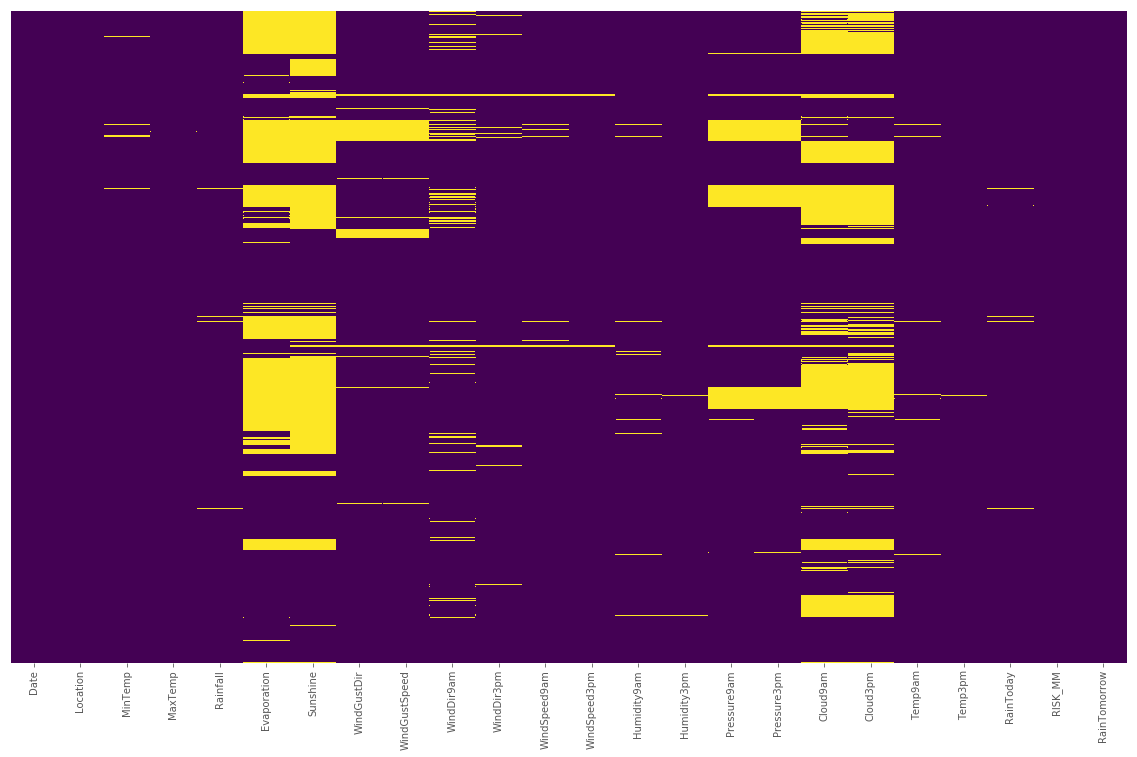

In [17]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

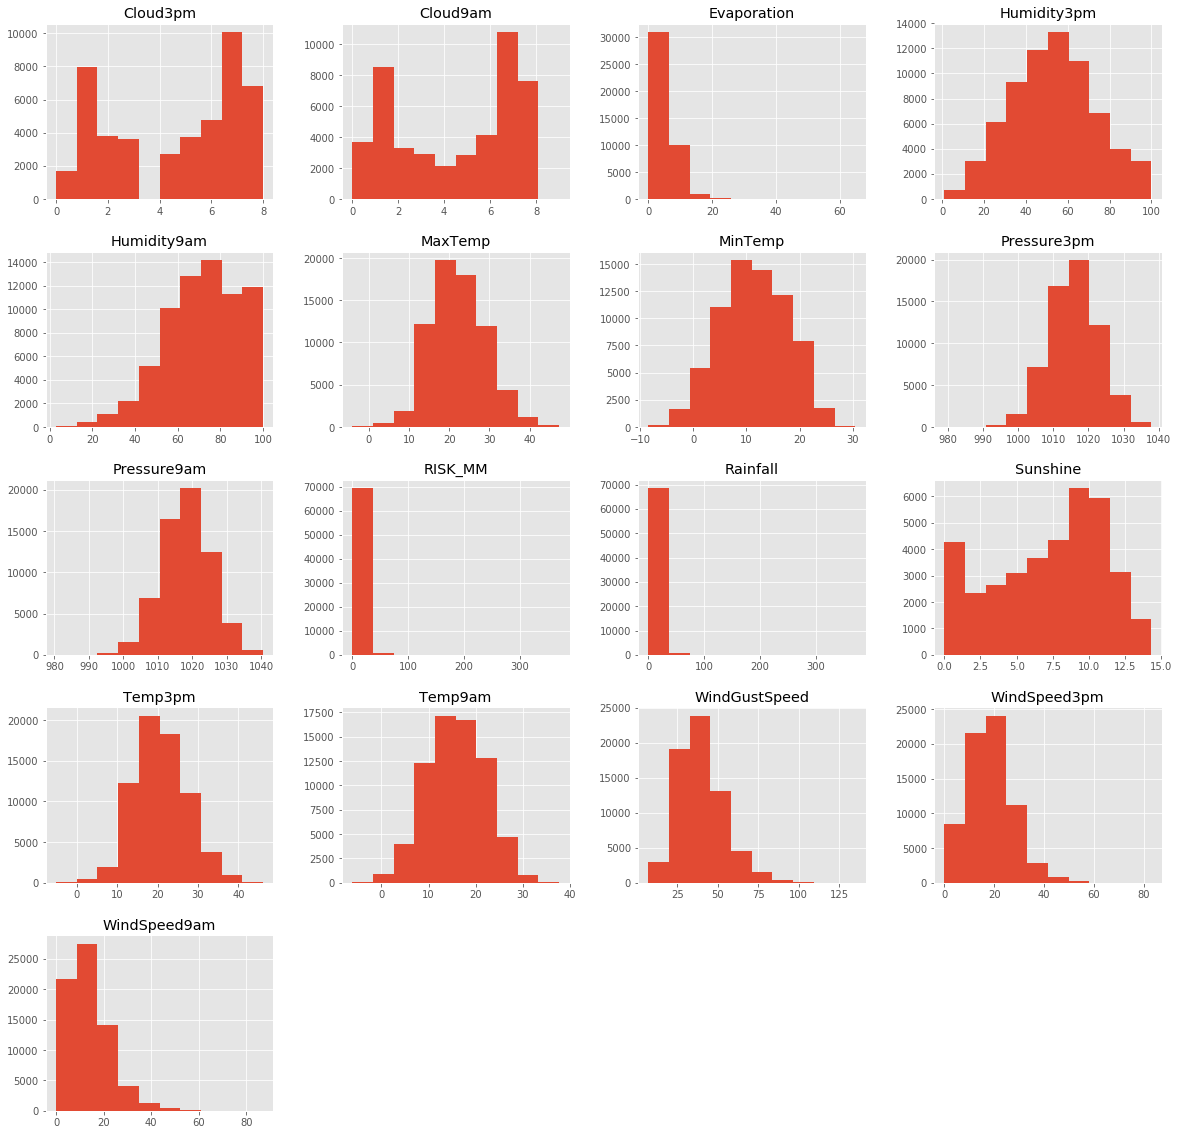

In [18]:
df[real_vars].hist(figsize=(20, 20));

# Препроцесинг

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


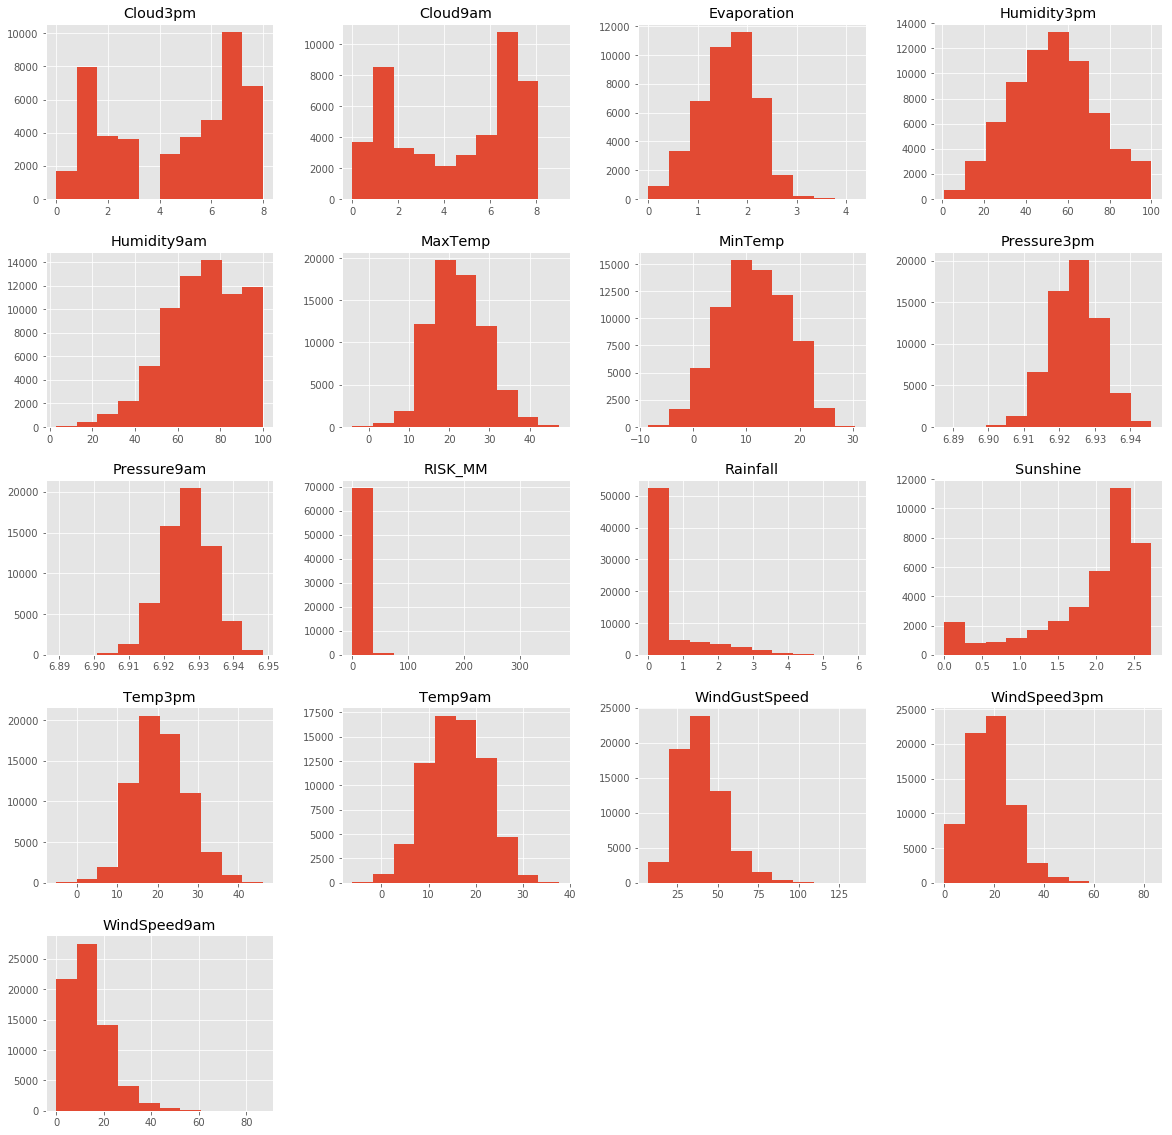

In [19]:
#Логорифмировать
vars_to_log = ["Evaporation", "Rainfall", "Sunshine", "Pressure3pm", "Pressure9am"]
df[vars_to_log] = df[vars_to_log].apply(lambda w: np.log(w + 1))
real_vars_hist = df[real_vars].hist(figsize=(20, 20))
#Пожать категориальные 

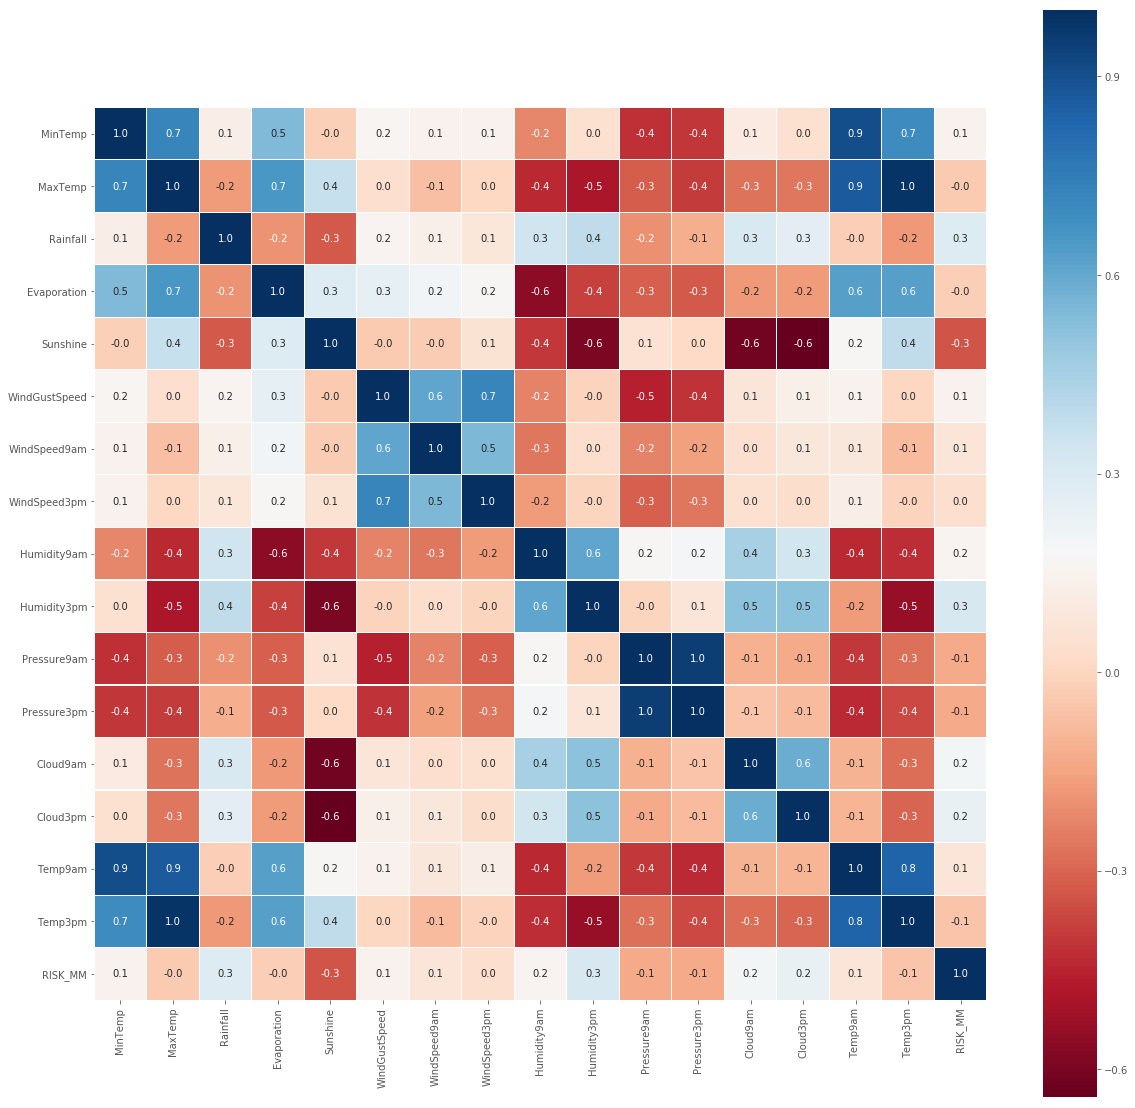

In [20]:
plt.figure(figsize=(20,20))
corr = df.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

## Scatter coor to RISK_MM

Cloud3pm
Cloud9am
MaxTemp
Pressure9am
Humidity3pm
WindGustSpeed
MinTemp
Rainfall
WindSpeed3pm
Temp3pm
Sunshine
Evaporation
Humidity9am
Temp9am
Pressure3pm
WindSpeed9am


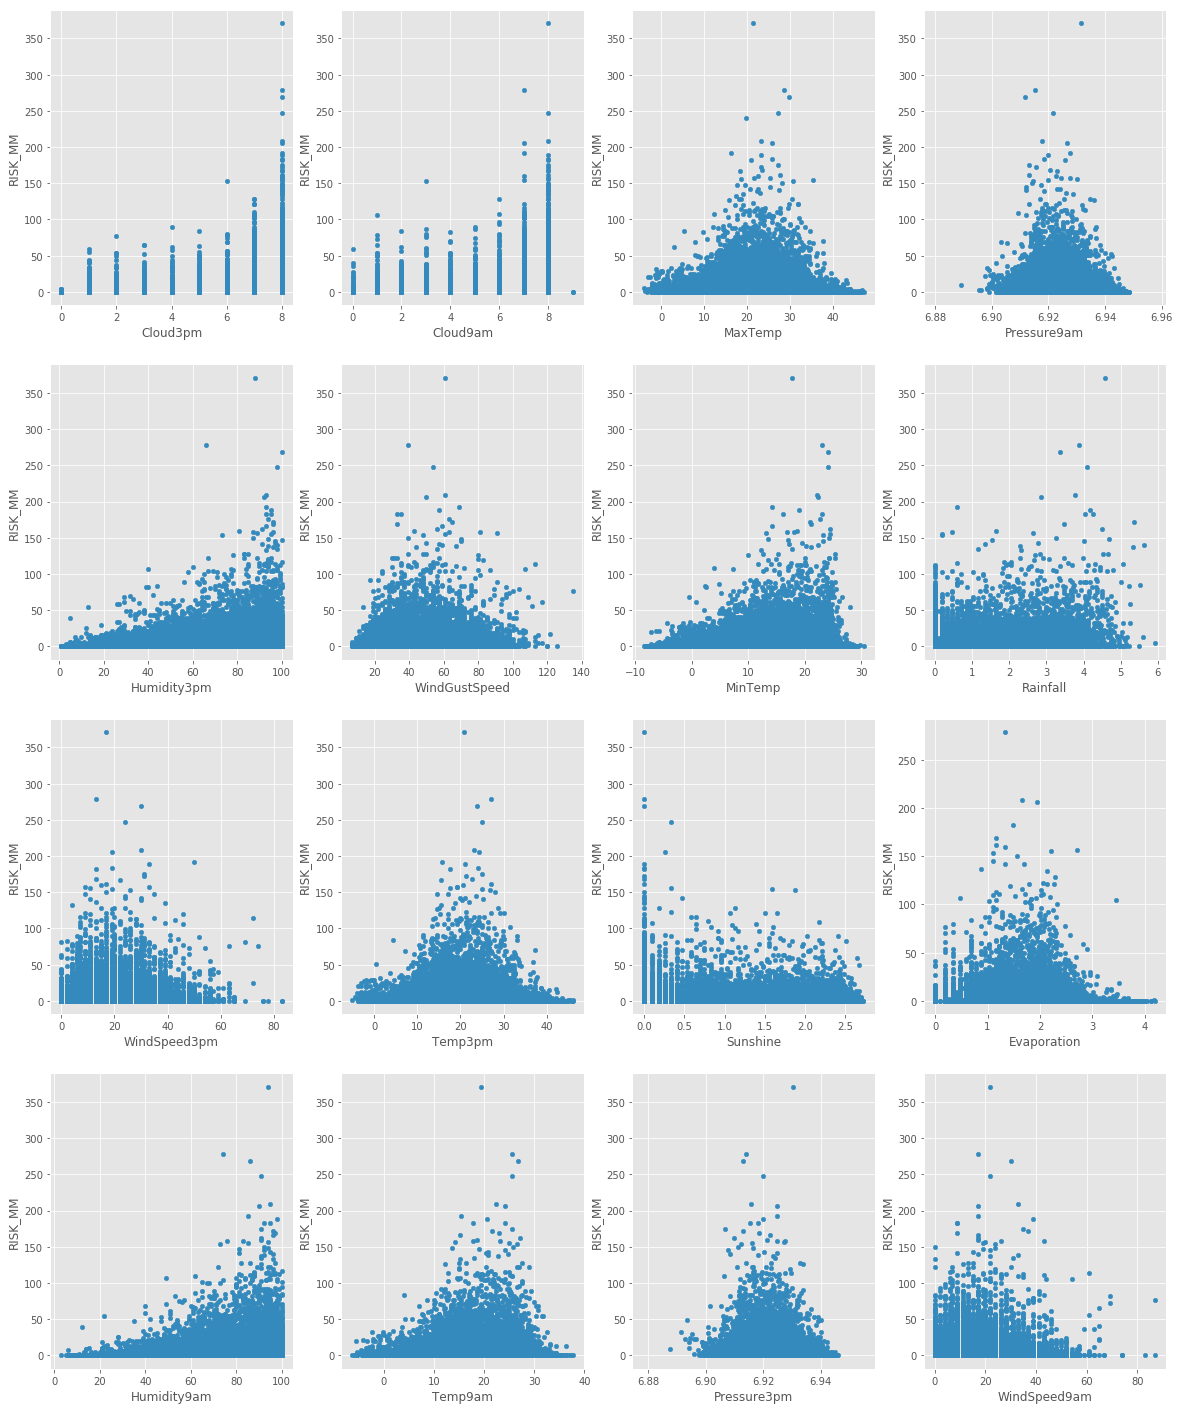

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 25))


for i, feature in enumerate((list(set(real_vars) - set(["RISK_MM"])))):
    df.plot(feature, "RISK_MM", subplots=True, kind="scatter", ax=axes[i // 4, i % 4])

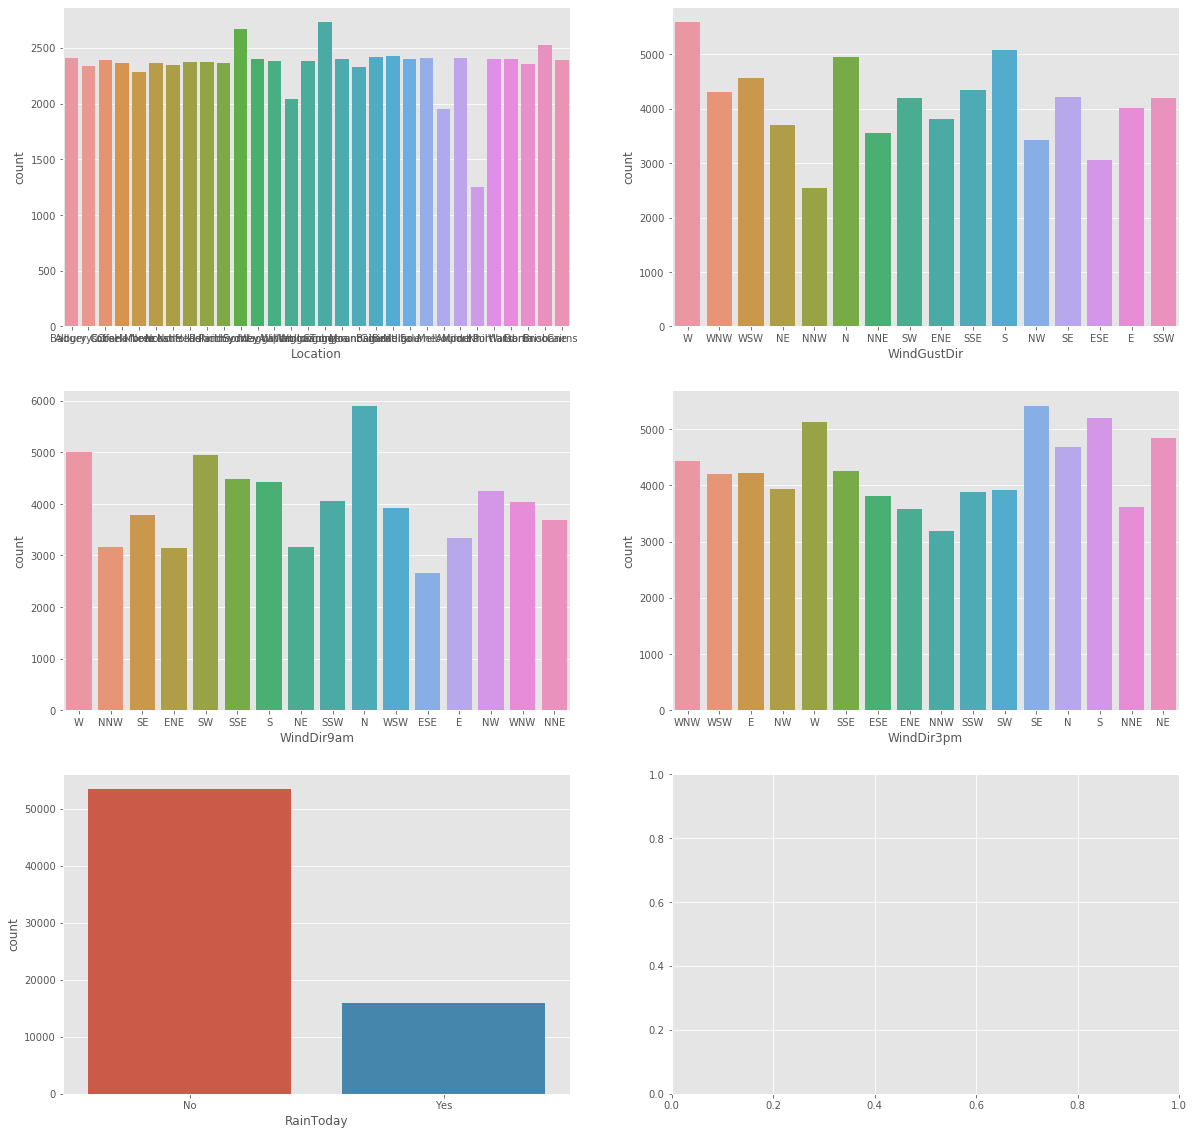

In [90]:
fig, axes = plt.subplots(3,2, figsize=(20, 20))

for i in range(len(cat_vars)):
    sns.countplot(x = cat_vars[i], data = df, ax = axes[i // 2, i % 2])

In [ ]:
df.groupby("Location").describe()["RISK_MM"]["mean"].plot.bar()

In [ ]:
print(df[df[label] == "Yes"]["RISK_MM"].value_counts().sort_index())
df[df[label] == "Yes"]["RISK_MM"].hist()

In [ ]:
print(df[df[label] == "No"]["RISK_MM"].value_counts().sort_index())

## заполнение пропусков

In [107]:
data = df.copy()

data[real_vars] = data[real_vars].fillna(0)

to_drop = ["Date", "WindGustDir", "WindDir9am", "WindDir3pm", "RISK_MM"]
data = data.drop(columns = to_drop)

## one-hot encoding 

In [108]:
data = pd.get_dummies(data, columns = ["Location", "RainToday"], dummy_na=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 51 columns):
MinTemp                      70240 non-null float64
MaxTemp                      70240 non-null float64
Rainfall                     70240 non-null float64
Evaporation                  70240 non-null float64
Sunshine                     70240 non-null float64
WindGustSpeed                70240 non-null float64
WindSpeed9am                 70240 non-null float64
WindSpeed3pm                 70240 non-null float64
Humidity9am                  70240 non-null float64
Humidity3pm                  70240 non-null float64
Pressure9am                  70240 non-null float64
Pressure3pm                  70240 non-null float64
Cloud9am                     70240 non-null float64
Cloud3pm                     70240 non-null float64
Temp9am                      70240 non-null float64
Temp3pm                      70240 non-null float64
RainTomorrow                 70240 non-null object
Location

In [109]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_SydneyAirport,Location_Tuggeranong,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Wollongong,Location_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,1,0,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,19.2,29.1,0.0,0.0,0.0,52.0,22.0,37.0,61.0,56.0,...,0,0,0,0,0,0,0,1,0,0
70236,20.0,28.2,8.2,0.0,0.0,50.0,20.0,31.0,75.0,62.0,...,0,0,0,0,0,0,0,0,1,0
70237,19.8,29.1,0.0,0.0,0.0,41.0,24.0,31.0,62.0,54.0,...,0,0,0,0,0,0,0,1,0,0
70238,18.8,28.3,3.4,0.0,0.0,33.0,17.0,24.0,69.0,44.0,...,0,0,0,0,0,0,0,0,1,0


## export to csv

In [110]:
data.to_csv("training_prepared.csv")